In [111]:
import numpy as np
from varname import nameof

# adapted from stack overflow
def bmatrix(a, var_name, exercise=1):
    """Stores in a file a LaTeX bmatrix from a numpy array."""
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join([f"{float(x):.6g}" for x in l.split()]) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    with open(f"./aux-matrices/ex-{exercise}/{var_name}.tex", 'w+') as f:
      f.write('\n'.join(rv))

# 1)

In [112]:
w_1 = np.array([[1, 1, 1]]).T

def sign(x, w):
  return np.sign(np.dot(x, w))

X = np.array([
  [1, 0, 0, 0],
  [1, 0, 2, 1],
  [1, 1, 1, 1],
  [1, 1, -1, 0]
])

LABELS = np.array([
  [-1, 1, 1, -1]
]).T

[x_1, x_2, x_3, x_4] = X

bmatrix(X, nameof(X))
bmatrix(x_1, nameof(x_1))
bmatrix(x_2, nameof(x_2))
bmatrix(x_3, nameof(x_3))
bmatrix(x_4, nameof(x_4))
bmatrix(LABELS, nameof(LABELS))
bmatrix(w_1, nameof(w_1))

In [113]:
ETA = 1

x_1_first_3 = x_1[:3]
bmatrix(x_1_first_3, nameof(x_1_first_3))
x_2_first_3 = x_2[:3]
bmatrix(x_2_first_3, nameof(x_2_first_3))
x_3_first_3 = x_3[:3]
bmatrix(x_3_first_3, nameof(x_3_first_3))
x_4_first_3 = x_4[:3]
bmatrix(x_4_first_3, nameof(x_4_first_3))

def update_weights(w, x, z):
  return w + ETA * (z - sign(x, w)[0]) * x.reshape(-1, 1)

# updates will be done considering only the first (dummy) feature plus the next two

w_2 = update_weights(w_1, x_1_first_3, LABELS[0][0])
bmatrix(w_2, nameof(w_2))
w_3 = update_weights(w_2, x_2_first_3, LABELS[1][0])
bmatrix(w_3, nameof(w_3))
w_4 = update_weights(w_3, x_3_first_3, LABELS[2][0])
bmatrix(w_4, nameof(w_4))
w_5 = update_weights(w_4, x_4_first_3, LABELS[3][0])
bmatrix(w_5, nameof(w_5))

In [114]:
# do the same, but now considering all features

w_1_all = np.array([[1, 1, 1, 1]]).T
bmatrix(w_1_all, nameof(w_1_all))

w_2_all = update_weights(w_1_all, x_1, LABELS[0][0])
bmatrix(w_2_all, nameof(w_2_all))
w_3_all = update_weights(w_2_all, x_2, LABELS[1][0])
bmatrix(w_3_all, nameof(w_3_all))
w_4_all = update_weights(w_3_all, x_3, LABELS[2][0])
bmatrix(w_4_all, nameof(w_4_all))
w_5_all = update_weights(w_4_all, x_4, LABELS[3][0])
bmatrix(w_5_all, nameof(w_5_all))

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


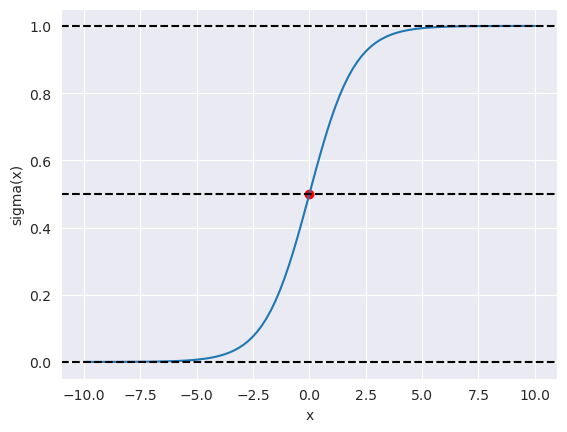

In [115]:
# plot the sigmoid function, sigma(x)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

# sns.lineplot(x, y), mark the point sigma(0) = 0.5 (and add a dashed line)

sns.lineplot(x, y)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.5, color='black', linestyle='--')
plt.axhline(y=1, color='black', linestyle='--')
plt.scatter(0, 0.5, color='red')

plt.xlabel("x")
plt.ylabel("sigma(x)")

plt.savefig('./assets/sigmoid.png')
plt.show()

# 2)

In [116]:
ETA = 1
X = np.array([
  [1, 1, 1],
  [1, 2, 1],
  [1, 1, 3],
  [1, 3, 3]
])

[x_1, x_2, x_3, x_4] = X

bmatrix(x_1.reshape(-1, 1), nameof(x_1), 2)
bmatrix(x_2.reshape(-1, 1), nameof(x_2), 2)
bmatrix(x_3.reshape(-1, 1), nameof(x_3), 2)
bmatrix(x_4.reshape(-1, 1), nameof(x_4), 2)

Z = np.array([
  [1, 1, 0, 0]
]).T

[z_1, z_2, z_3, z_4] = Z

w = np.array([
  [1, 1, 1]
]).T

bmatrix(X.T, nameof(X), 2)
bmatrix(w, nameof(w), 2)

In [117]:
# compute the batch update

sum_matrix = [
  x_i * (z_i - sigmoid(np.dot(2 * x_i, w.reshape(-1, 1)))) * (1 - sigmoid(np.dot(2 * x_i, w.reshape(-1, 1)))) * sigmoid(np.dot(2 * x_i, w.reshape(-1, 1)))
  for x_i, z_i in zip(X, Z)
]

x_1_matrix = [
  x_1 * (z_1 - sigmoid(np.dot(2 * x_1, w.reshape(-1, 1)))) * (1 - sigmoid(np.dot(2 * x_1, w.reshape(-1, 1)))) * sigmoid(np.dot(2 * x_1, w.reshape(-1, 1)))
]

w_2 = w + 2 * ETA * np.sum(sum_matrix, axis=0).reshape(-1, 1)

print(w_2)
bmatrix(w_2, nameof(w_2), 2)

w_new = w + 2 * ETA * np.sum(x_1_matrix, axis=0).reshape(-1, 1)

print(f"(z - sigmoid): {Z[0] - sigmoid(np.dot(2 * X[0], w.reshape(-1, 1)))}")
print(f"(1 - sigmoid): {1 - sigmoid(np.dot(2 * X[0], w.reshape(-1, 1)))}")
print(f"sigmoid: {sigmoid(np.dot(2 * X[0], w.reshape(-1, 1)))}")

print(w_new)
bmatrix(w_new, nameof(w_new), 2)

[[0.99991997]
 [0.99991687]
 [0.99973507]]
(z - sigmoid): [0.00247262]
(1 - sigmoid): [0.00247262]
sigmoid: [0.99752738]
[[1.0000122]
 [1.0000122]
 [1.0000122]]


# 3)

In [118]:
bmatrix(x_1.reshape(-1, 1), nameof(x_1), 3)
bmatrix(x_2.reshape(-1, 1), nameof(x_2), 3)
bmatrix(x_3.reshape(-1, 1), nameof(x_3), 3)
bmatrix(x_4.reshape(-1, 1), nameof(x_4), 3)

bmatrix(X.T, nameof(X), 3)
bmatrix(w, nameof(w), 3)

In [119]:
# compute the batch update

sum_matrix = [
  x_i * (z_i - sigmoid(np.dot(x_i, w.reshape(-1, 1))))
  for x_i, z_i in zip(X, Z)
]

x_1_matrix = [
  x_1 * (z_1 - sigmoid(np.dot(x_1, w.reshape(-1, 1))))
]

print(x_1)
print(w.reshape(-1, 1))

w_2 = w + ETA * np.sum(sum_matrix, axis=0).reshape(-1, 1)

print(w_2)
bmatrix(w_2, nameof(w_2), 3)

w_new = w + ETA * np.sum(x_1_matrix, axis=0).reshape(-1, 1)

print(w_new)
bmatrix(w_new, nameof(w_new), 3)

[1 1 1]
[[1]
 [1]
 [1]]
[[-0.92698401]
 [-2.9071757 ]
 [-4.91177621]]
[[1.04742587]
 [1.04742587]
 [1.04742587]]


# 4)

In [133]:
X = np.array([1, 1, 1])

Z = 0

w = np.array([
  [0, 1, 0]
]).T

bmatrix(X.reshape(-1,1), nameof(X), 4)
bmatrix(w, nameof(w), 4)

ETA = 2

w_new = w + 2 * ETA * (
  X * np.dot(X, w) * np.exp(np.dot(X, w)**2) * (Z - np.exp(np.dot(X, w)**2))
).reshape(-1, 1)

bmatrix(w_new, nameof(w_new), 4)